In [1]:
"""
General imports and loading of the audio file for development and explorative research.
The audio signal is normalized in the time domain to its highest value.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import taunet_utils
%run transient_shaper_lib.ipynb

SAMPLE_LENGTH = 10

audio_data_with_labels = taunet_utils.read_audio_files(os.getcwd(), truncate_at=SAMPLE_LENGTH)

print("Audio data and labels:")
for audio_data, label, sample_rate in audio_data_with_labels:
  print(f"- Label: {label}, Audio data shape: {audio_data.shape}, Sample rate: {sample_rate}")

FRAME_LEN = 1   # in s


Audio data and labels:
- Label: 1 - looperman-l-5151565-0354397-spicy-drums, Audio data shape: (371525,), Sample rate: 96000
- Label: 2 - looperman-l-2379402-0354276-aftershock-hard-trap-drums-x-808-x-percs-kb, Audio data shape: (300667,), Sample rate: 96000
- Label: 8 - 652462__yellowtree__midwest-clean-guitar, Audio data shape: (456342,), Sample rate: 96000
- Label: untitled, Audio data shape: (302171,), Sample rate: 96000


In [2]:
sampleRate = 96000
BEAT_DETECTION_BUFFER_SIZE = 64
AUDIO_BUFFER_SIZE_S = 8
AUDIO_BUFFER_SIZE = sampleRate * AUDIO_BUFFER_SIZE_S
MAX_ONSETS = 4 * AUDIO_BUFFER_SIZE_S # 4 BPS IS 240 BPM


from ctypes import *
from typing import Literal
lib = CDLL("../src/af/AFInC.dll")  # Adjust path accordingly

lib.resetBuffer.argtypes = []
lib.resetBuffer.restype = None

lib.initAf.argtypes = []
lib.initAf.restype = None

lib.AFInCAppend.argtypes = [c_double]
lib.AFInCAppend.restype = None

lib.AFInCProcess.argtypes = []
lib.AFInCProcess.restype = None

lib.afGetT1A.argtypes = []
lib.afGetT1A.restype = c_double

lib.afGetT2A.argtypes = []
lib.afGetT2A.restype = c_double

lib.afGetTempo.argtypes = []
lib.afGetTempo.restype = c_double

lib.afGetSpectralCentroid.argtypes = []
lib.afGetSpectralCentroid.restype = c_double

lib.afGetSpectralFlatness.argtypes = []
lib.afGetSpectralFlatness.restype = c_double

lib.afGetPBandL.argtypes = []
lib.afGetPBandL.restype = c_double

lib.afGetPBandML.argtypes = []
lib.afGetPBandML.restype = c_double

lib.afGetPBandMH.argtypes = []
lib.afGetPBandMH.restype = c_double

lib.afGetPBandH.argtypes = []
lib.afGetPBandH.restype = c_double

lib.afGetCrestFactor.argtypes = []
lib.afGetCrestFactor.restype = c_double

lib.afGetSpectralFlux.argtypes = []
lib.afGetSpectralFlux.restype = c_double

# ----------------------------------------
# debug helpers
# ----------------------------------------
lib.__getAudioBuffer.argtypes = []
lib.__getAudioBuffer.restype = c_double

lib.__getEnvBuffer.argtypes = []
lib.__getEnvBuffer.restype = c_double

lib.__getOnsetBuffer.argtypes = []
lib.__getOnsetBuffer.restype = c_double

lib.__getTA1Buffer.argtypes = []
lib.__getTA1Buffer.restype = c_double

lib.__getTA2Buffer.argtypes = []
lib.__getTA2Buffer.restype = c_double

lib.__getBeatMagnitude.argtypes = [c_int]
lib.__getBeatMagnitude.restype = c_double

lib.__resetIndexDebug.argtypes = []
lib.__resetIndexDebug.restype = None

1 - looperman-l-5151565-0354397-spicy-drums
--- AF in C features ---
Tempo:  123.96694214876032
TA1:  0.01203125
TA2:  0.22513541666666667
Spectral centroid: 0.162144300581325
Spectral flatness: 0.0
EQ Low:  0.483582064340521 
EQ MidLow:  0.5895408826369473 
EQ MidHigh:  0.13364947048165524 
EQ High:  0.019397957856633046 
Crest Factor: 10.073801263878389
Spectral Flux:  47.529075622558594
-------
TA1 python percentile:  0.01203125
TA2 python percentile::  0.22513541666666667
32
(32, 512)


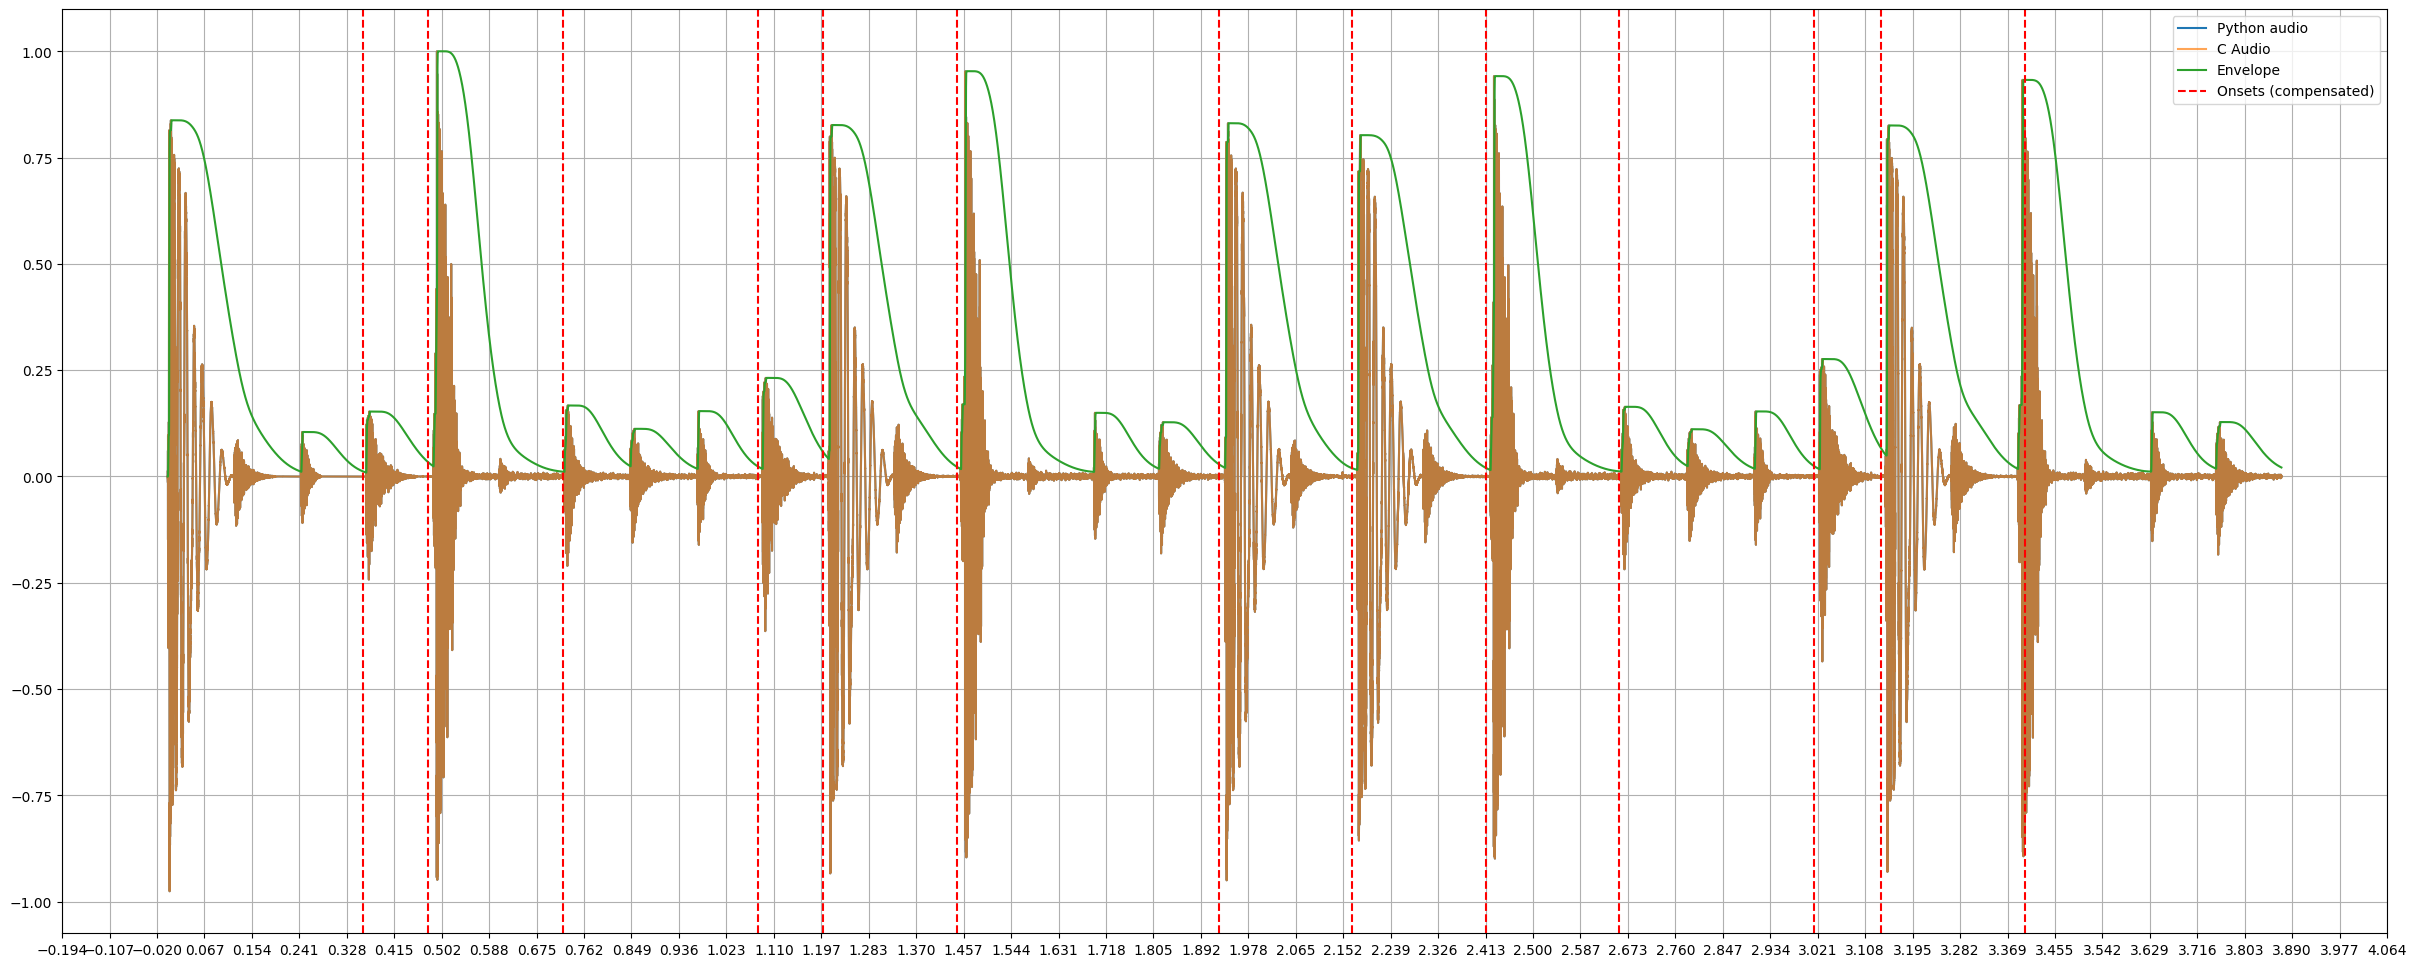

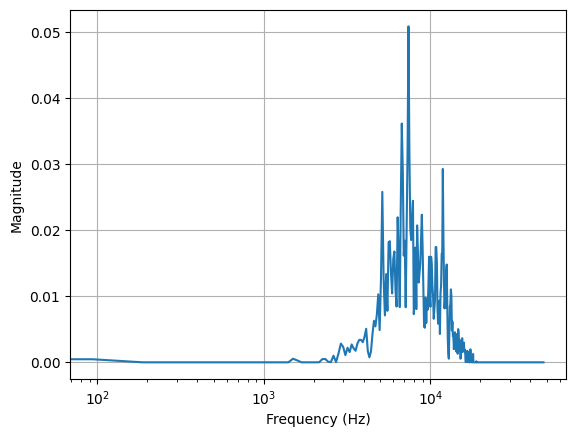

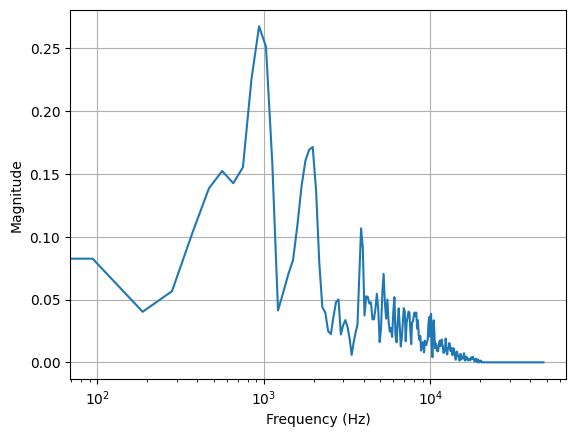

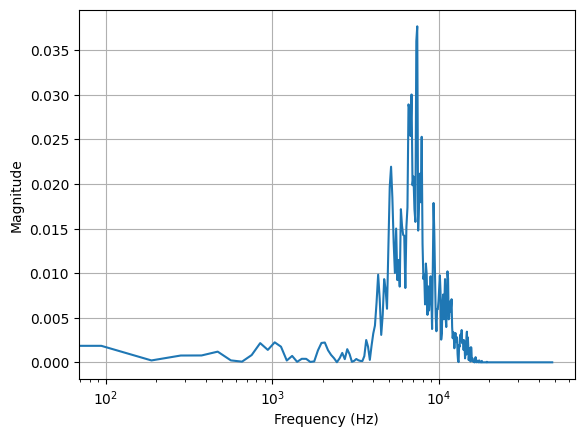

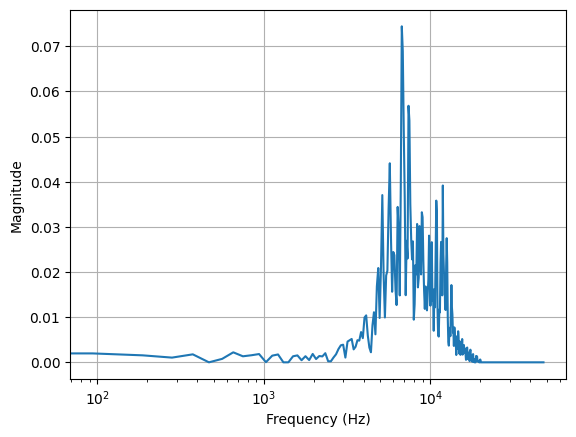

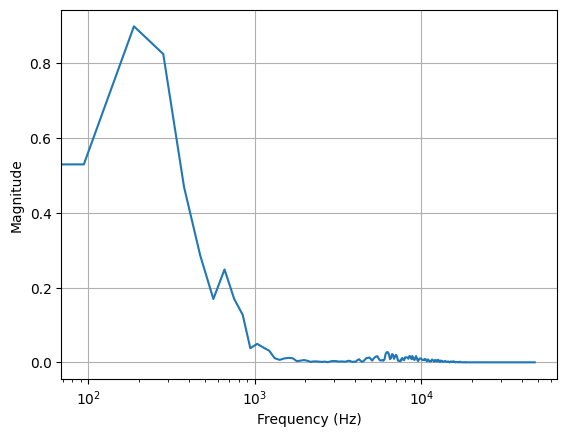

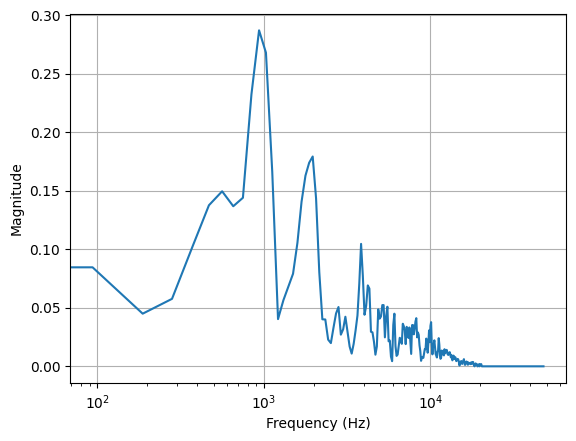

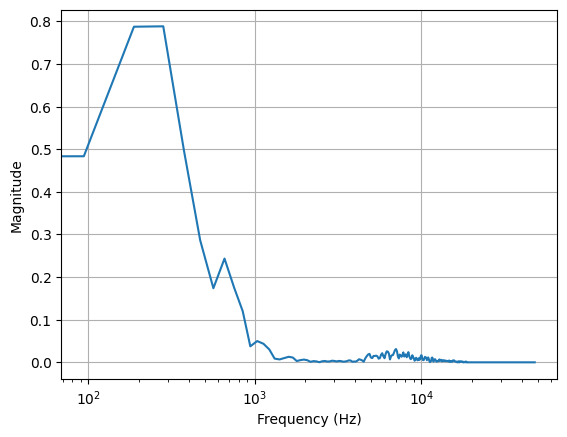

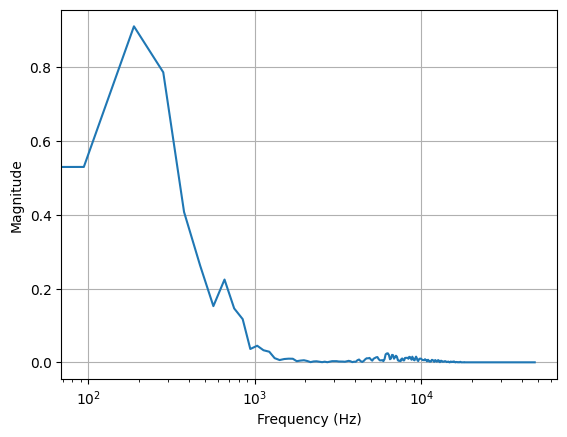

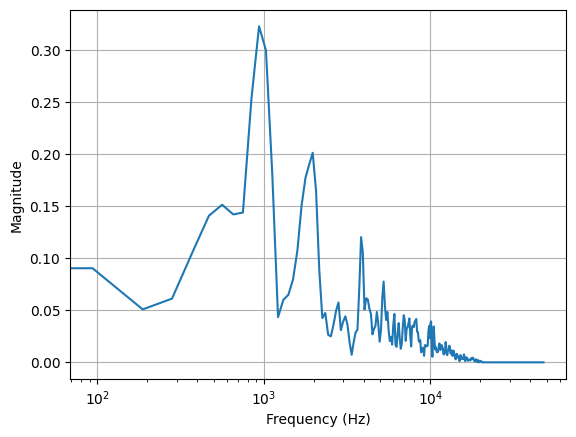

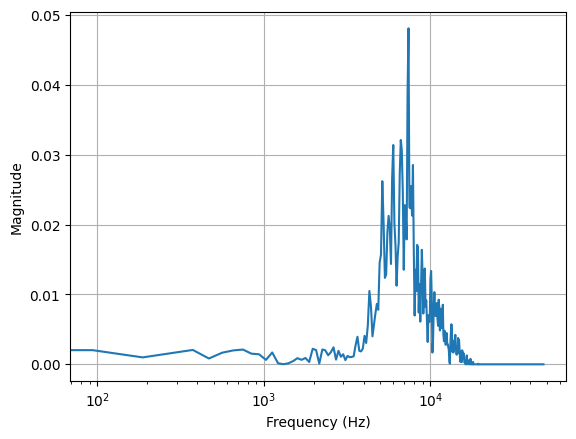

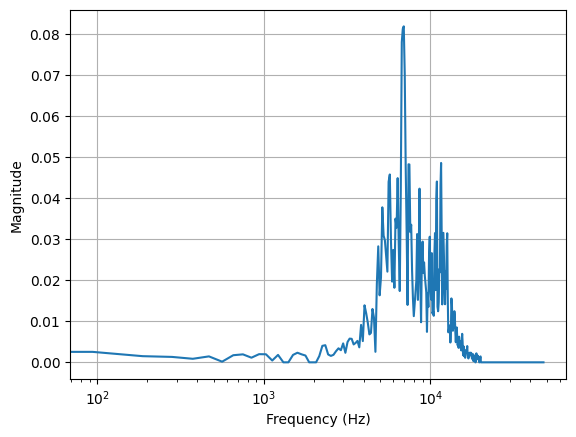

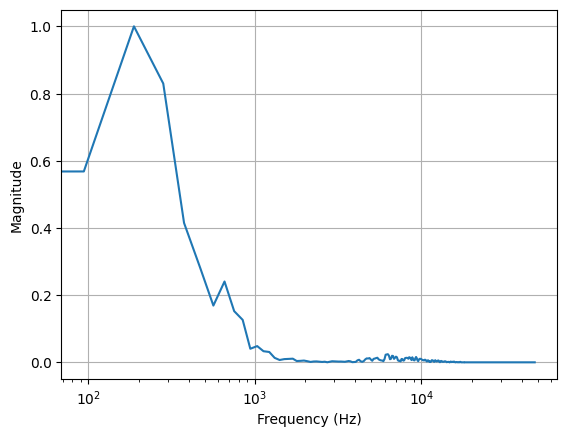

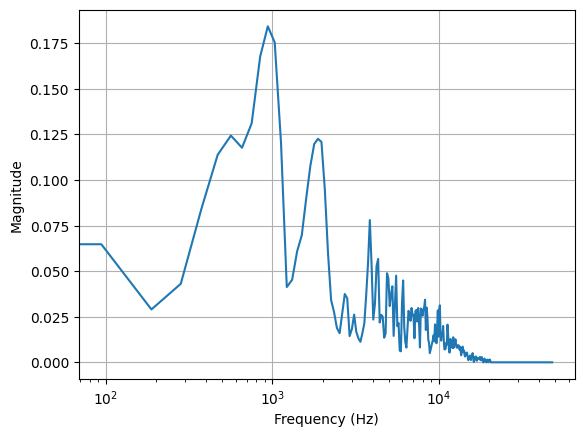

2 - looperman-l-2379402-0354276-aftershock-hard-trap-drums-x-808-x-percs-kb
--- AF in C features ---
Tempo:  153.0612244897959
TA1:  0.032239583333333335
TA2:  0.16953125
Spectral centroid: 0.11103690578020911
Spectral flatness: 24.050481252717997
EQ Low:  0.6706202243514708 
EQ MidLow:  0.2561046160130295 
EQ MidHigh:  0.05257170975868874 
EQ High:  0.03495777421574108 
Crest Factor: 2.3828603054456585
Spectral Flux:  94.4725112915039
-------
TA1 python percentile:  0.031281250000000003
TA2 python percentile::  0.16781770833333332
32
(32, 512)


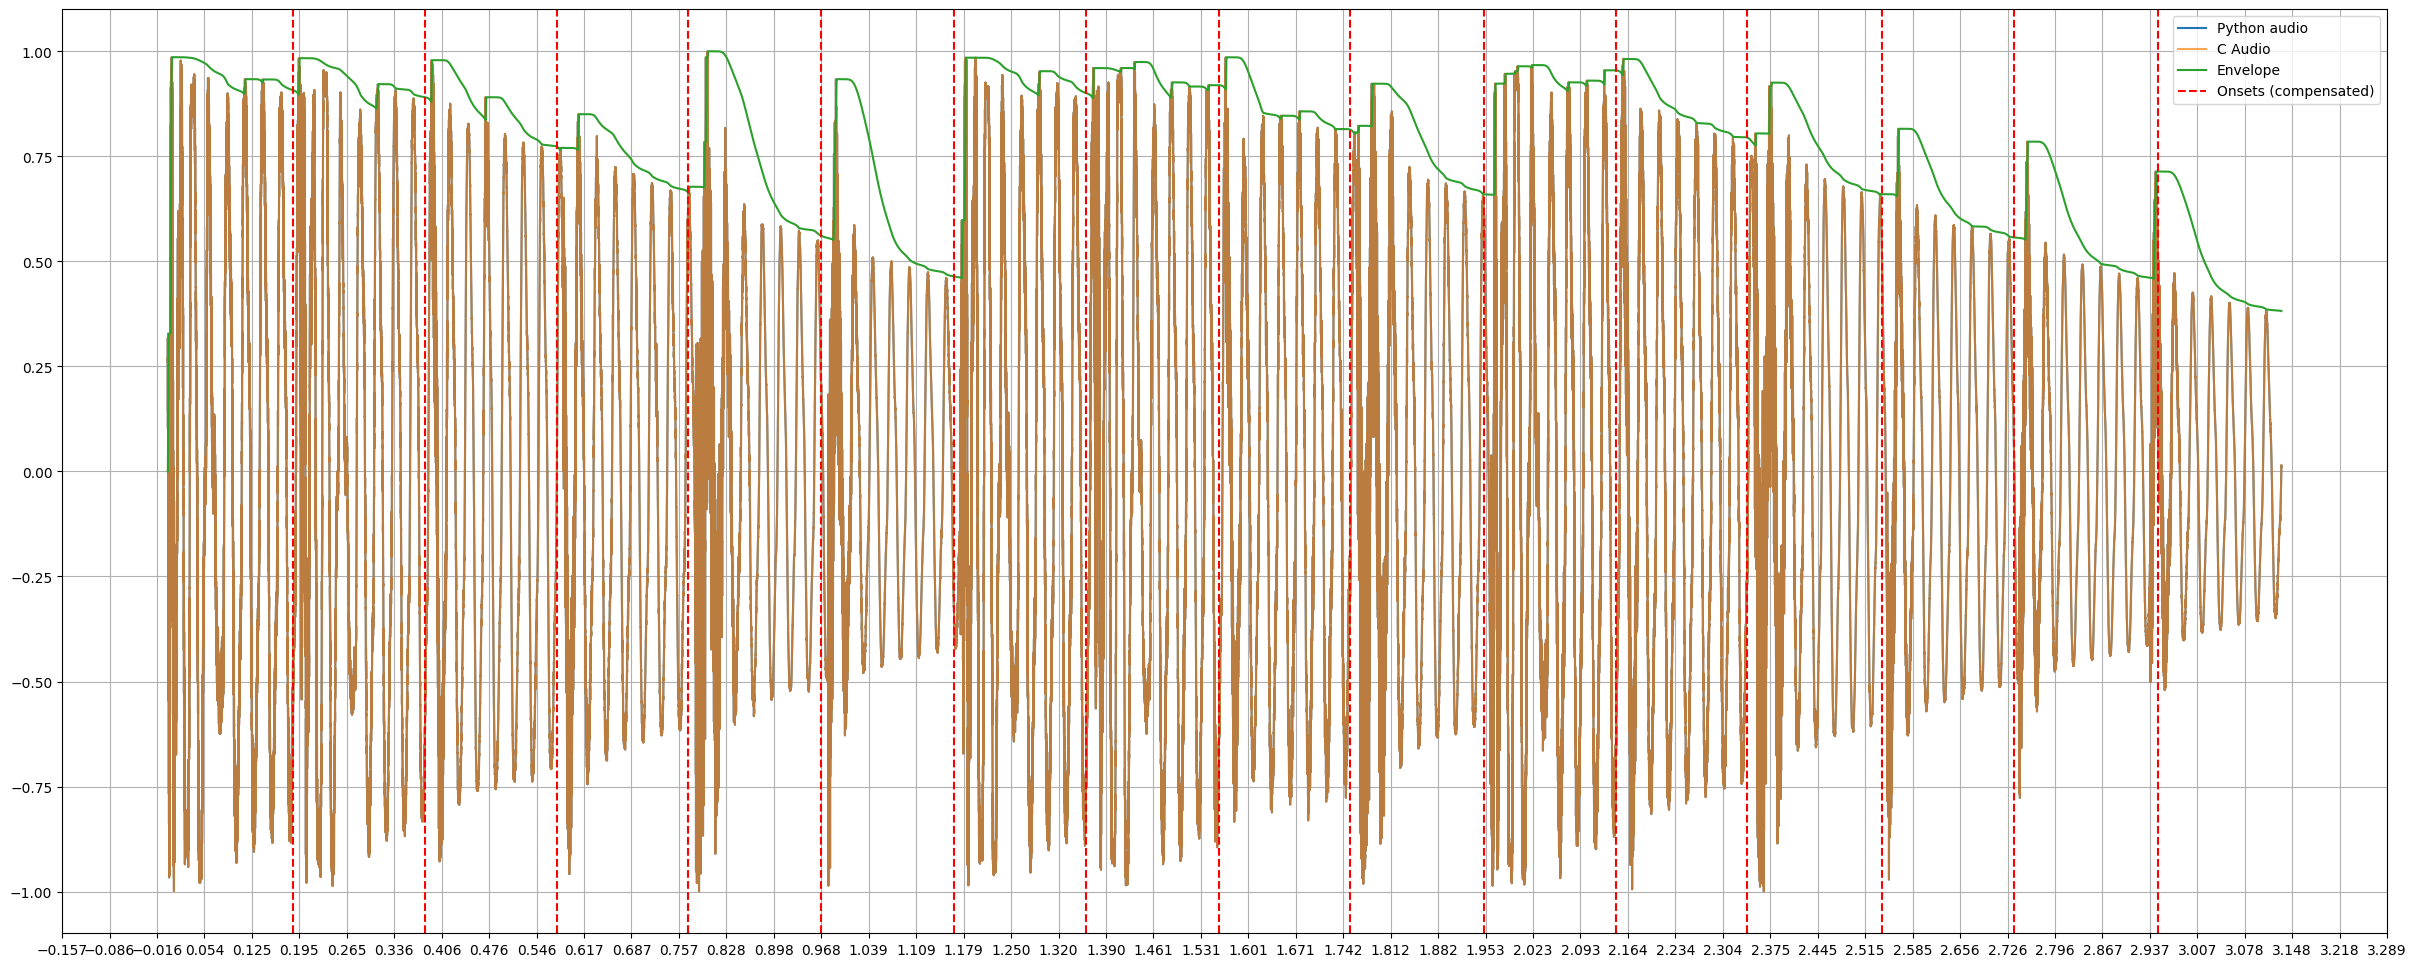

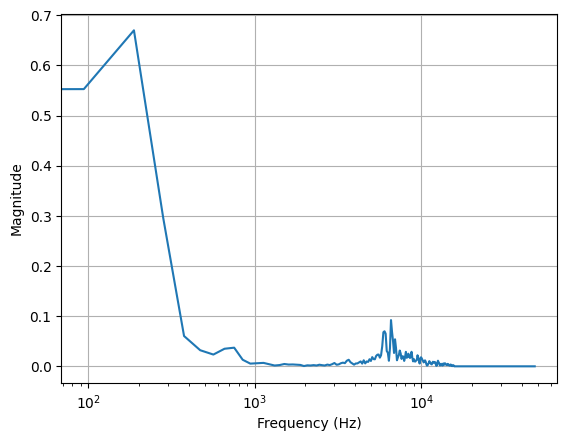

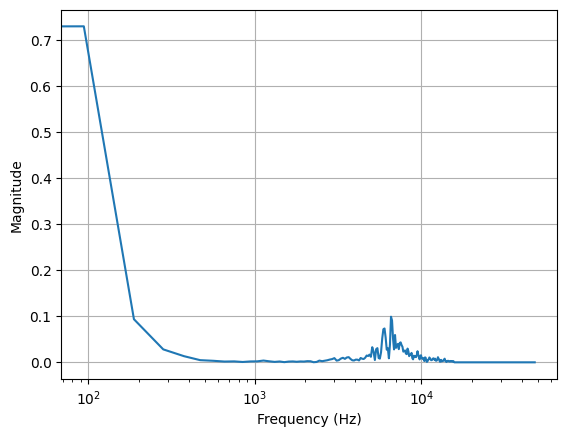

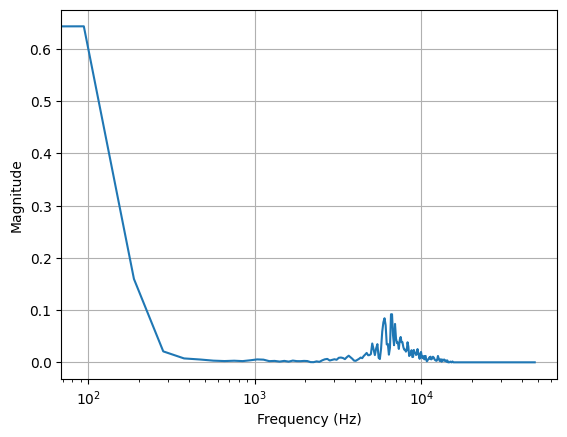

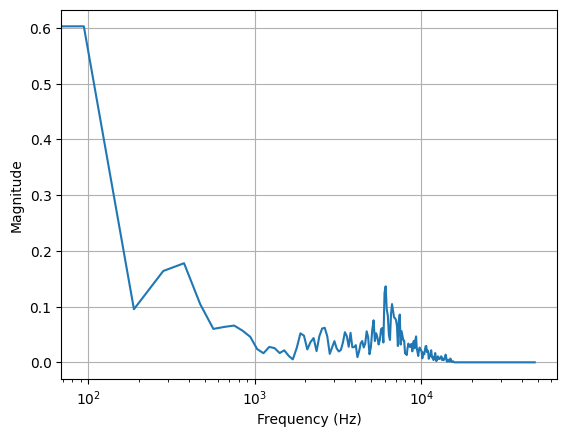

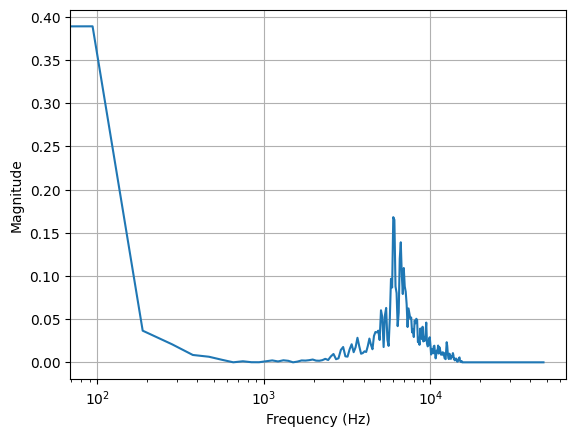

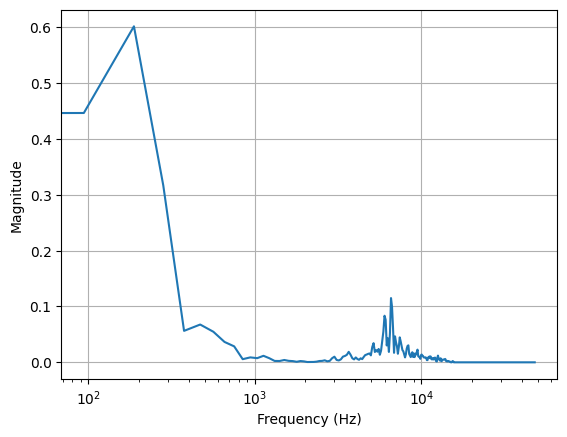

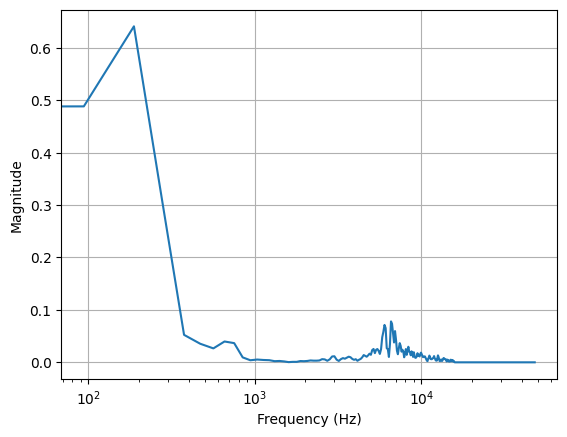

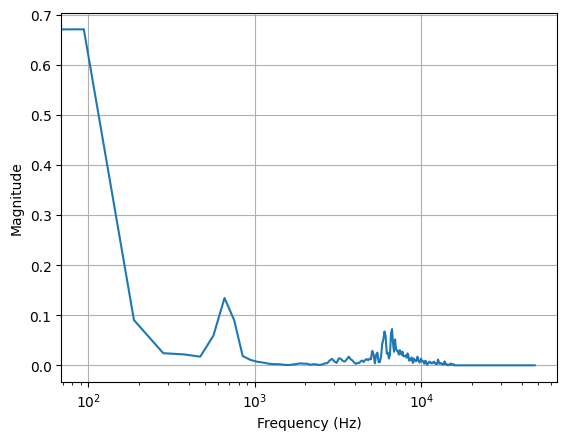

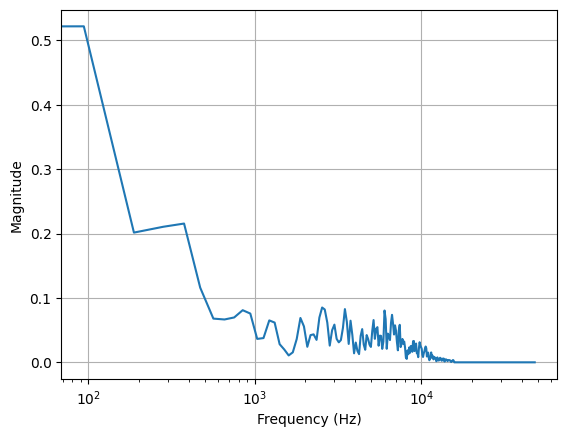

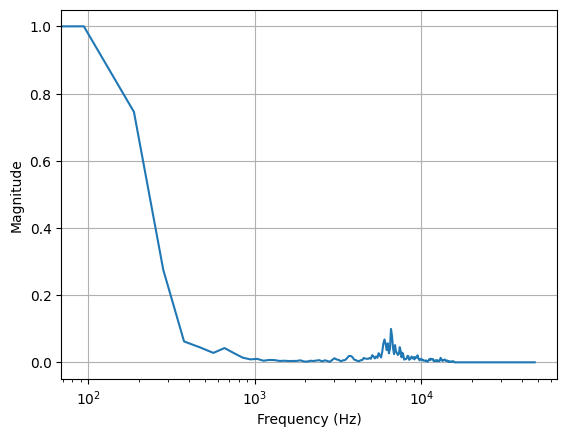

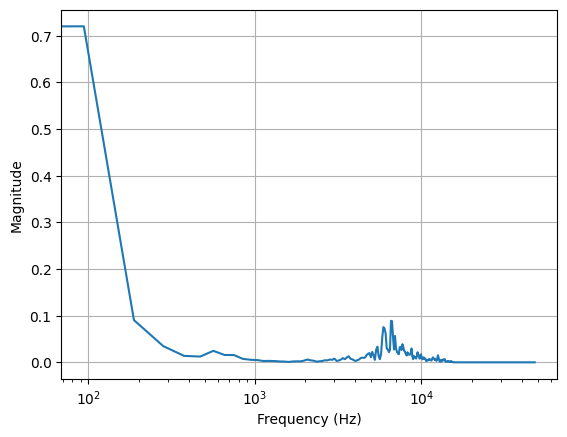

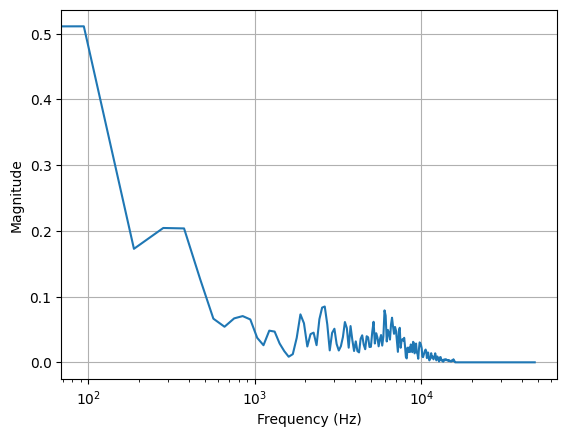

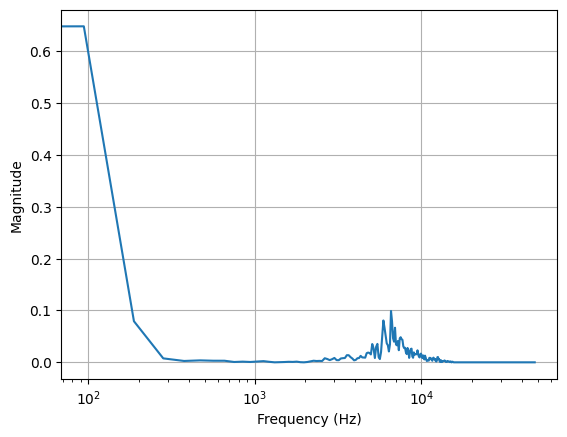

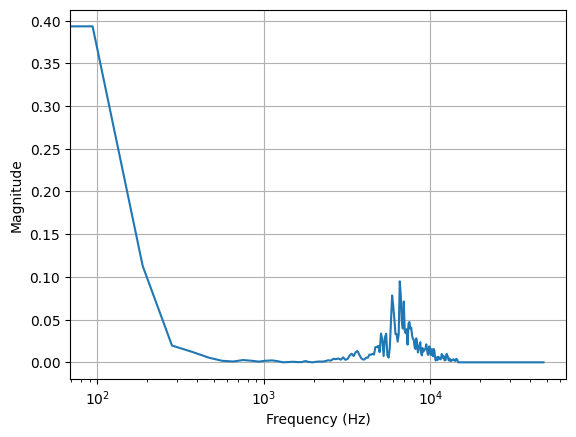

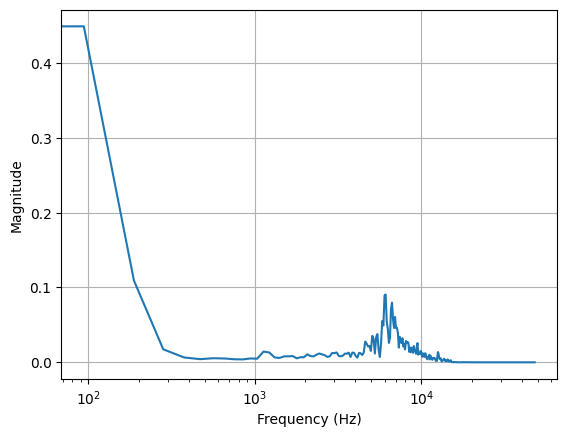

8 - 652462__yellowtree__midwest-clean-guitar
--- AF in C features ---
Tempo:  199.1150442477876
TA1:  0.026864583333333334
TA2:  0.18934375
Spectral centroid: 0.036693295483968116
Spectral flatness: 89.71847900120063
EQ Low:  0.674829174635926 
EQ MidLow:  0.2955701951709204 
EQ MidHigh:  0.08564986770111936 
EQ High:  0.023710670622259636 
Crest Factor: 3.19617815589129
Spectral Flux:  25.35823631286621
-------
TA1 python percentile:  0.026372395833333333
TA2 python percentile::  0.177671875
32
(32, 512)


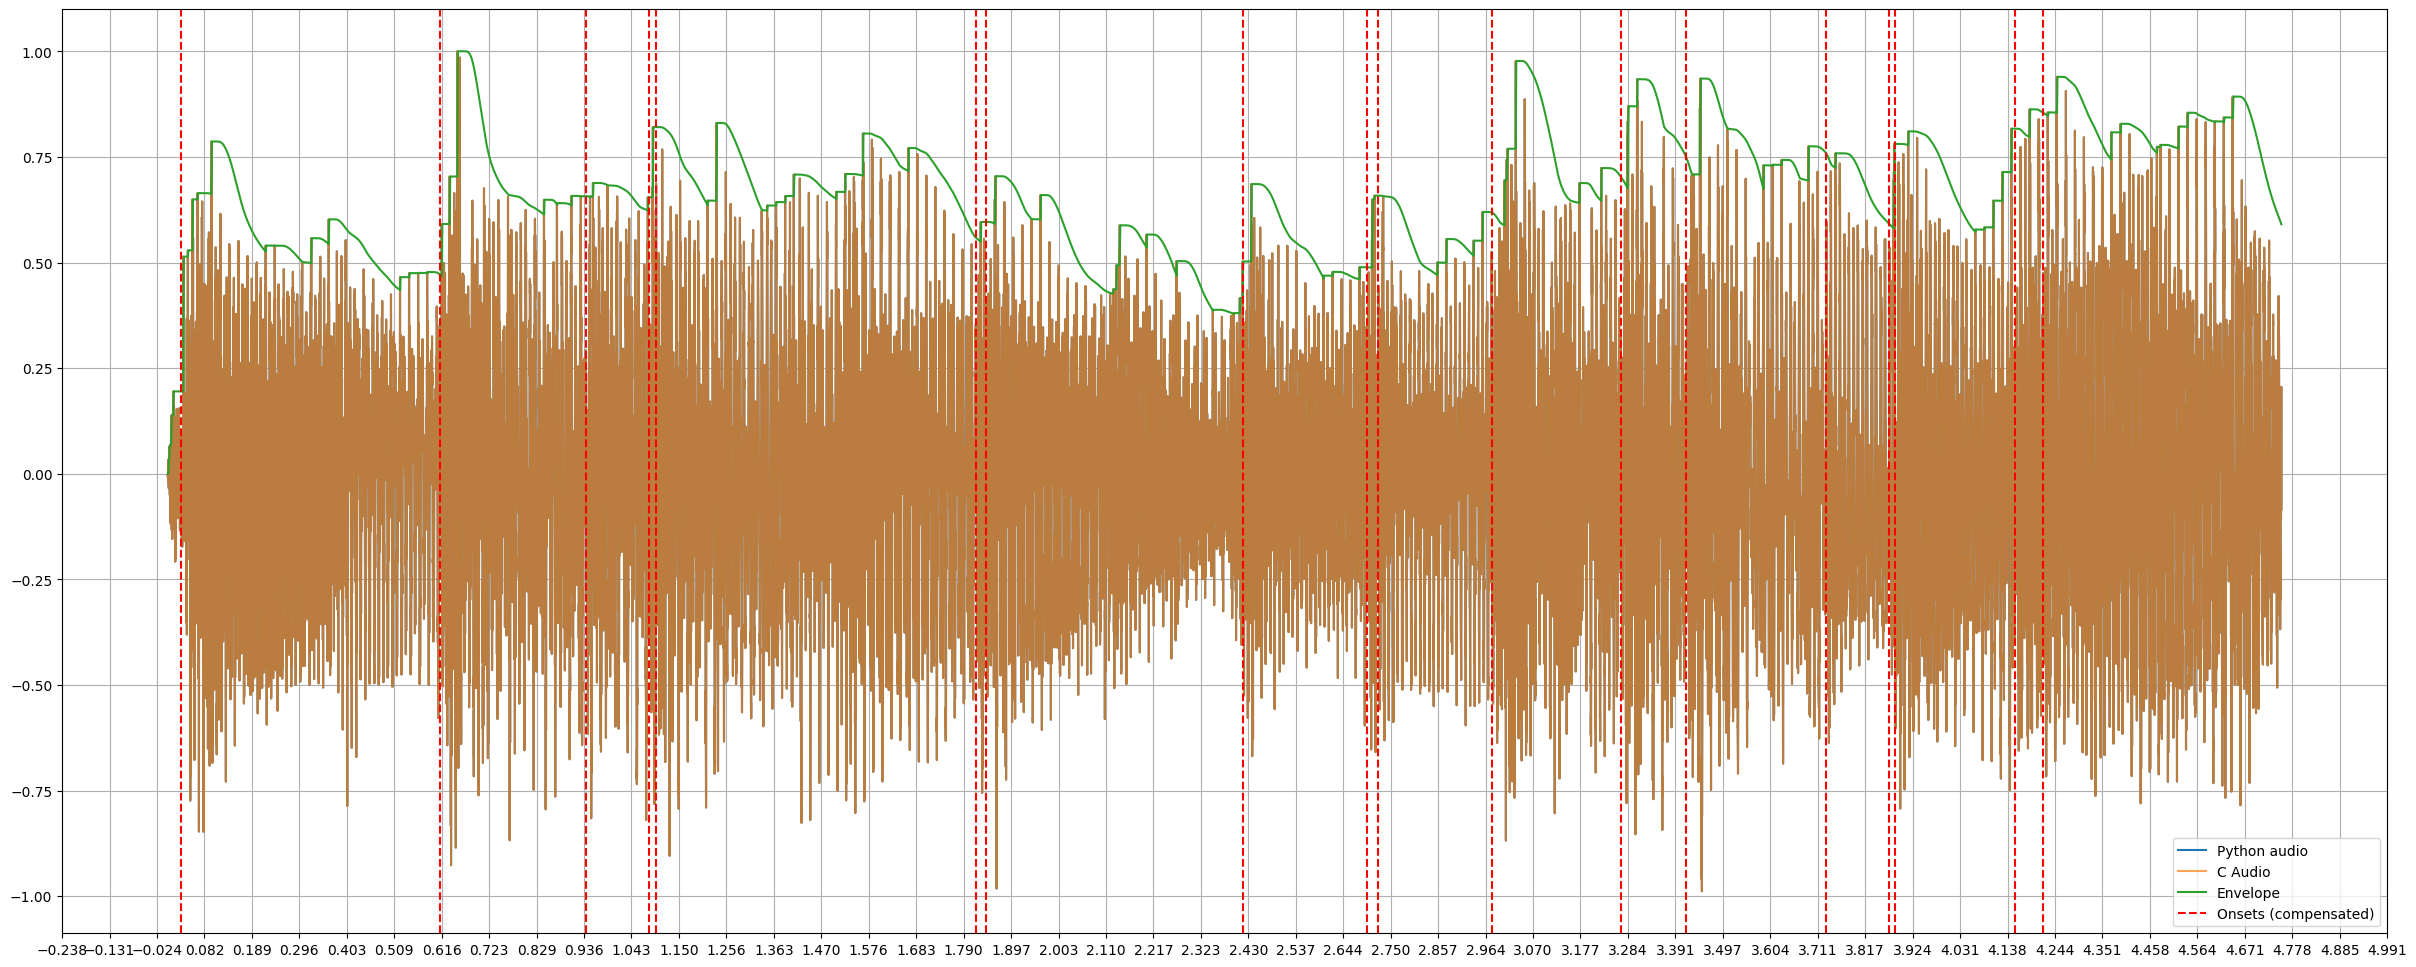

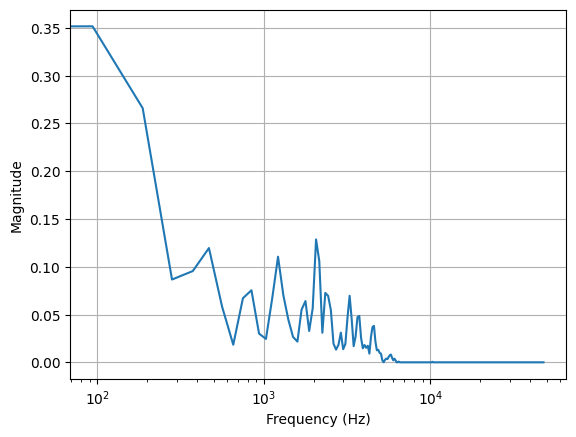

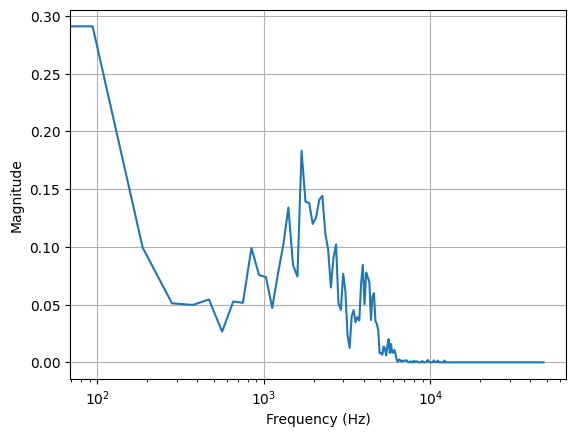

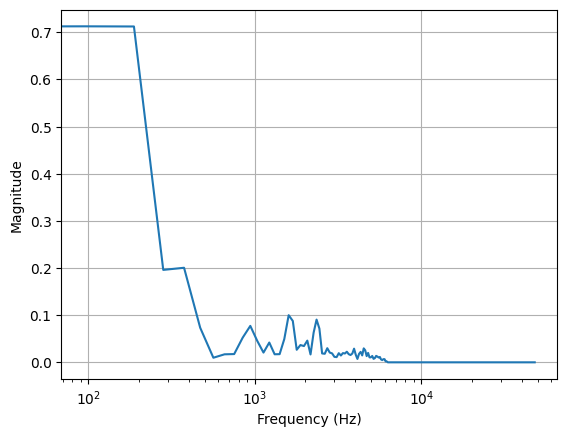

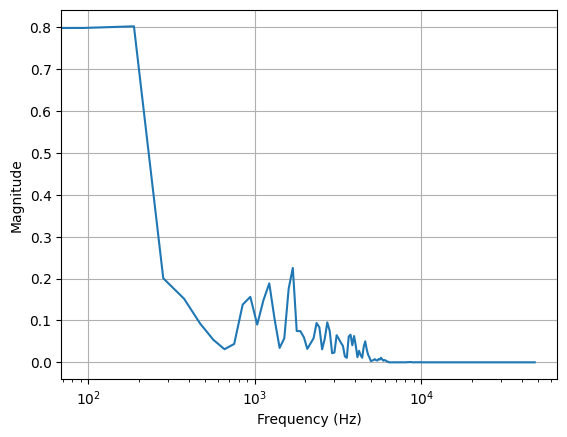

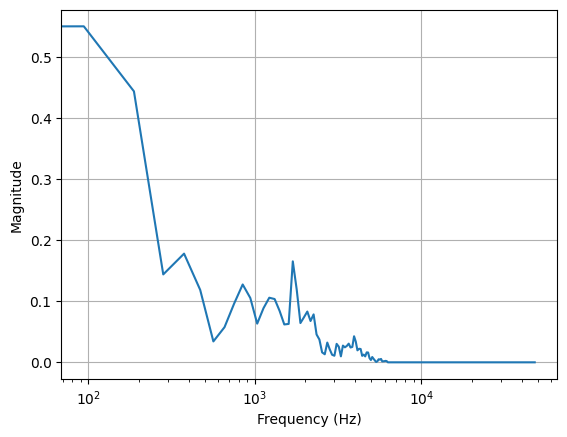

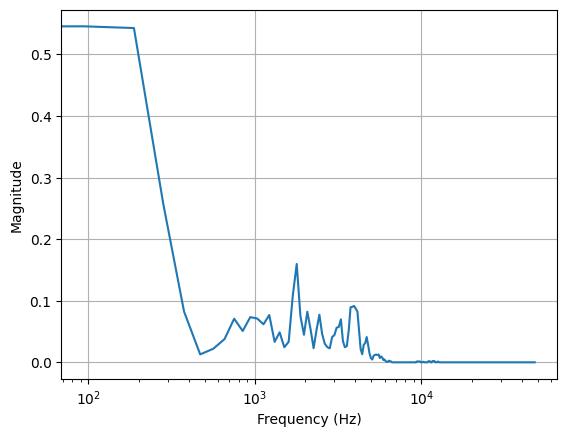

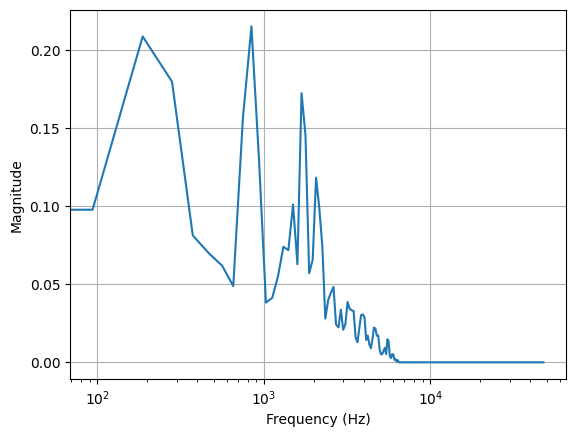

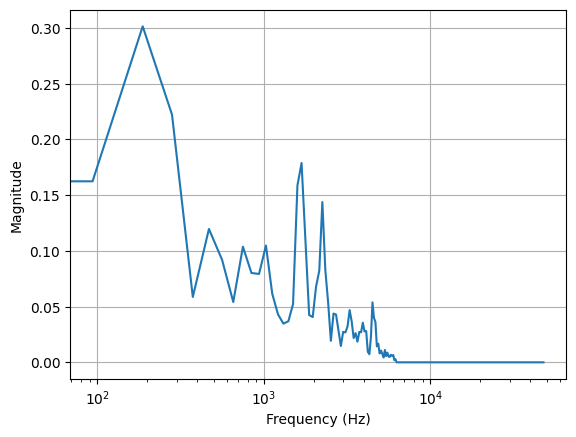

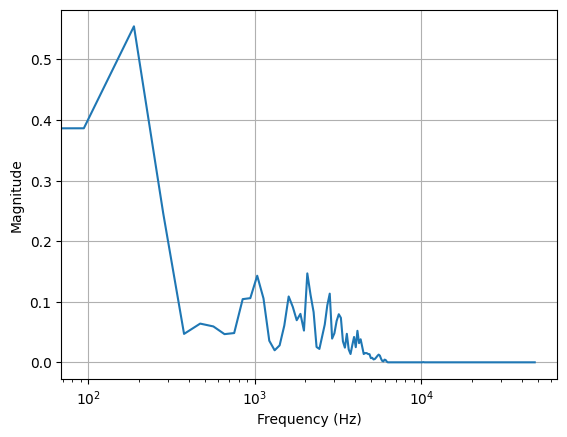

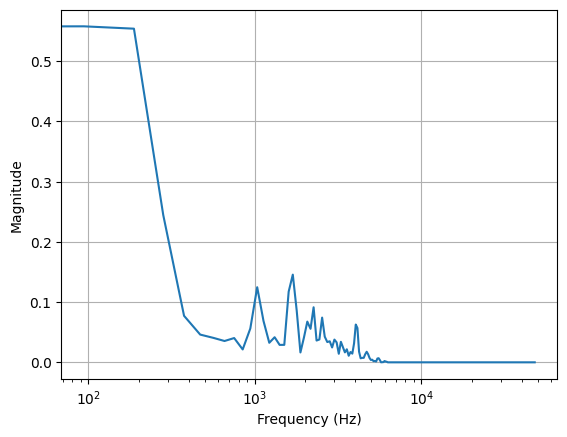

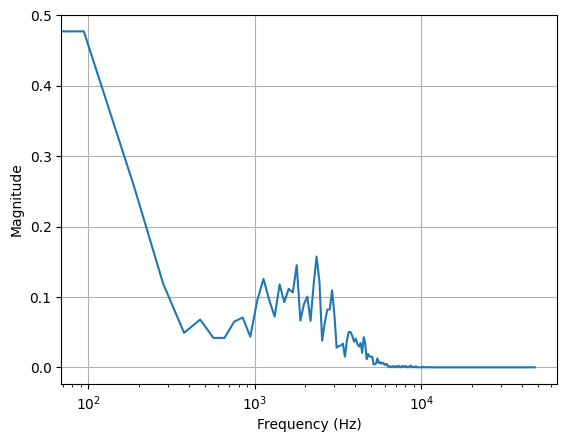

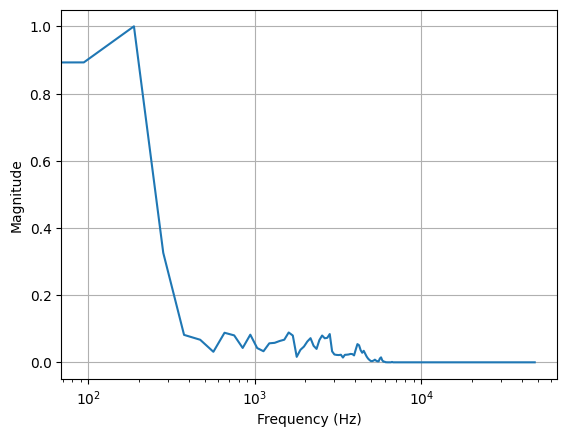

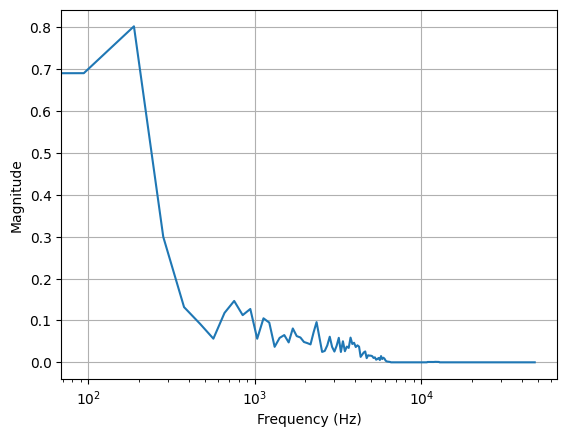

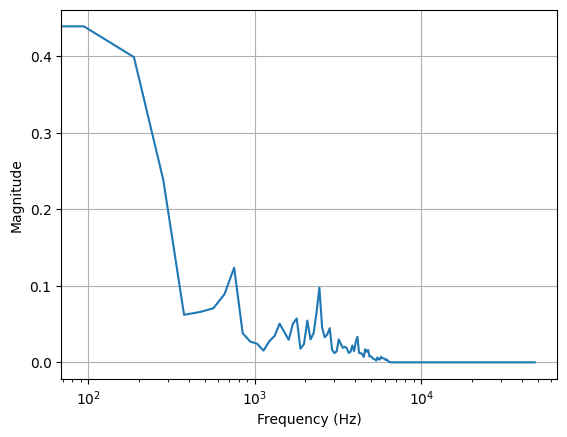

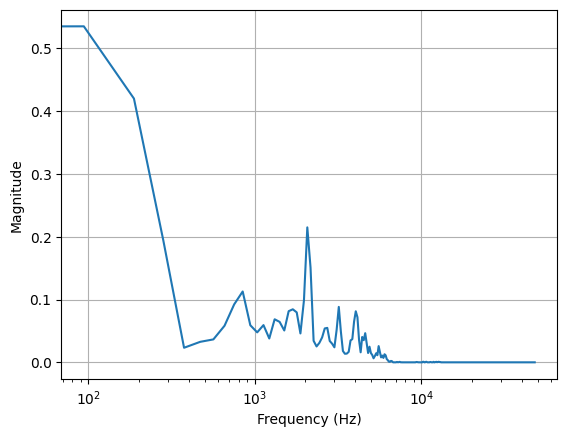

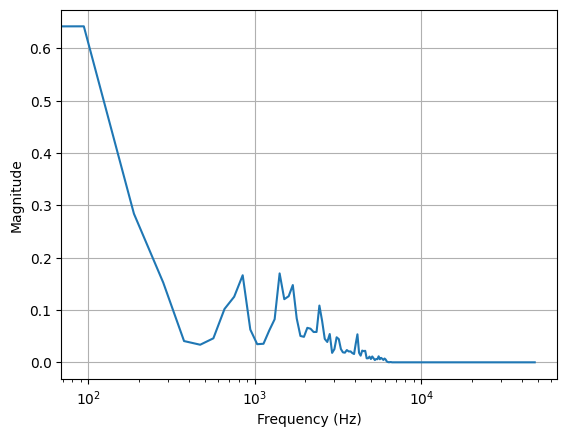

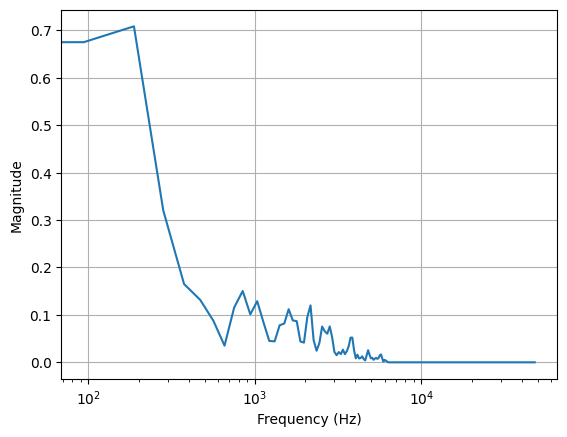

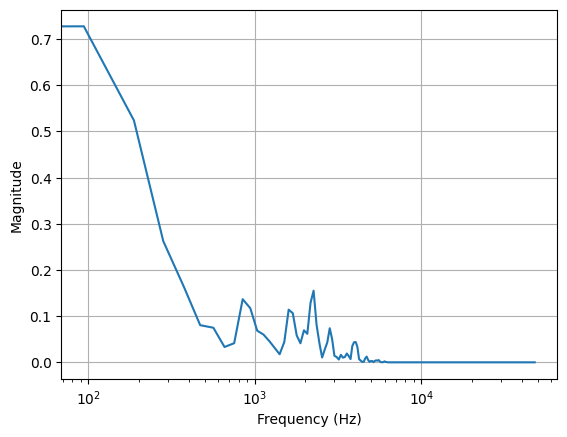

untitled
--- AF in C features ---
Tempo:  144.6945337620579
TA1:  0.08123958333333334
TA2:  0.35783333333333334
Spectral centroid: 0.055256584526230716
Spectral flatness: 58.69279221255205
EQ Low:  0.10766048905235104 
EQ MidLow:  0.16279283328507071 
EQ MidHigh:  0.4420173164724366 
EQ High:  0.009938149957380014 
Crest Factor: 9.105405869901693
Spectral Flux:  0.0
-------
TA1 python percentile:  0.06295572916666667
TA2 python percentile::  0.312859375
32
(32, 512)


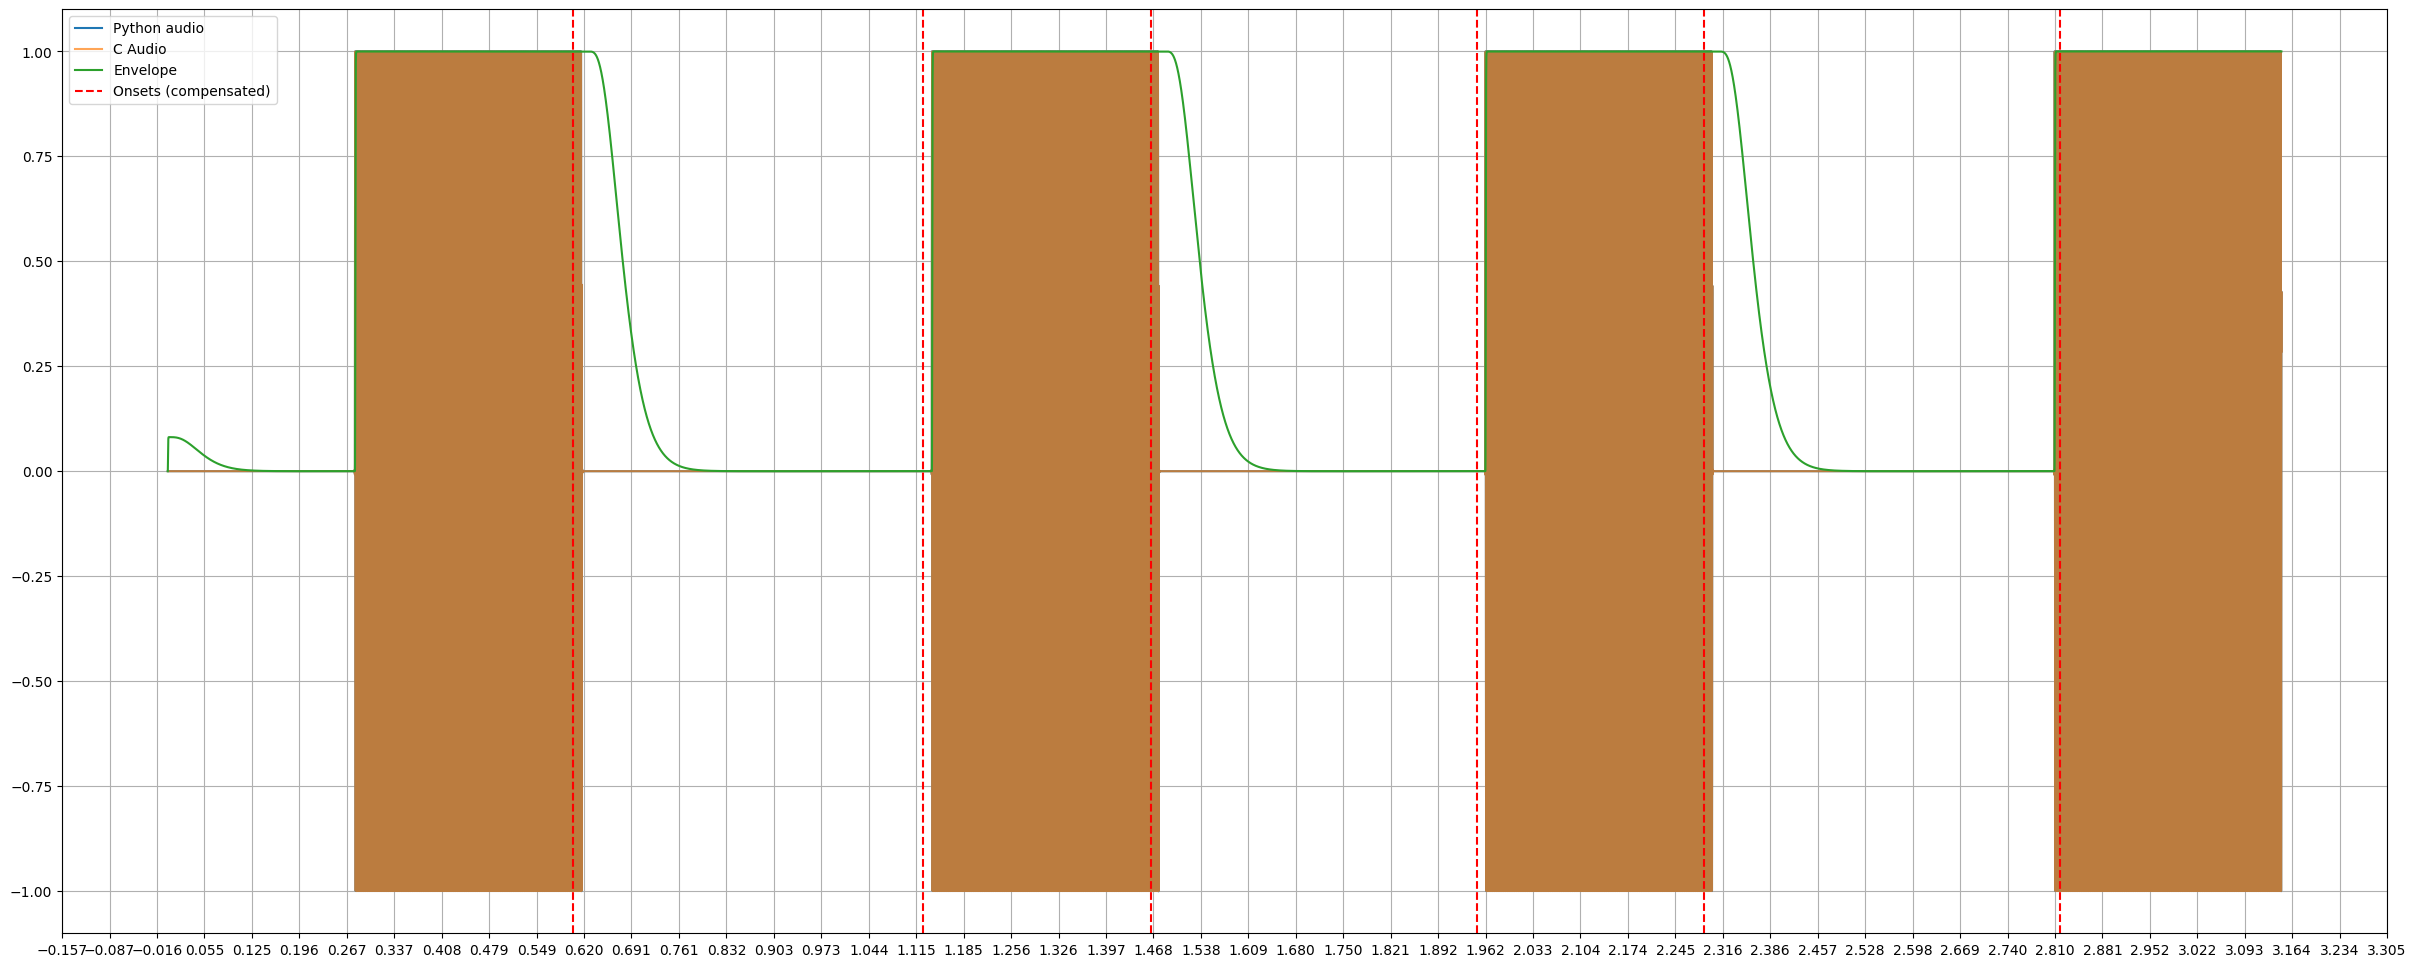

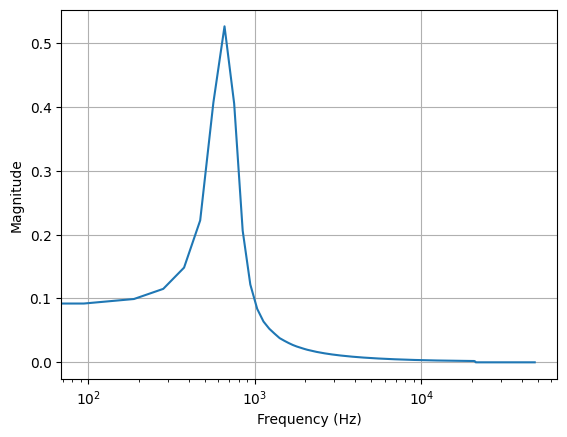

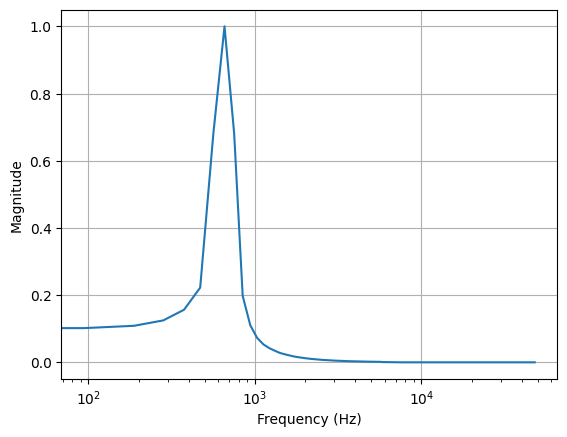

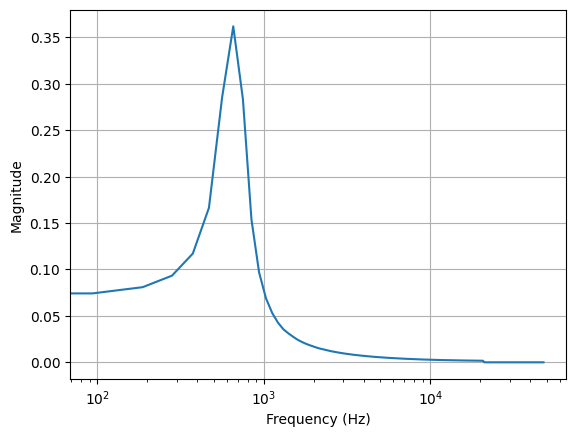

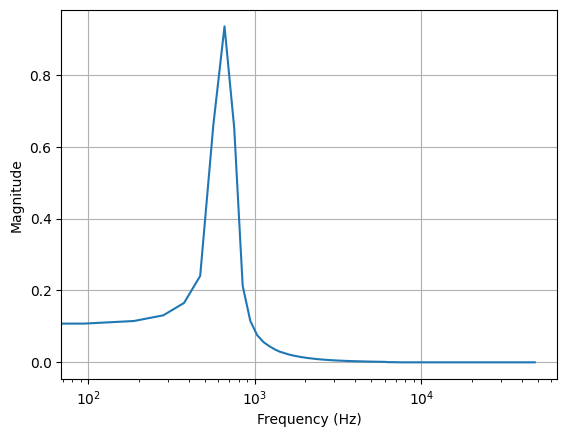

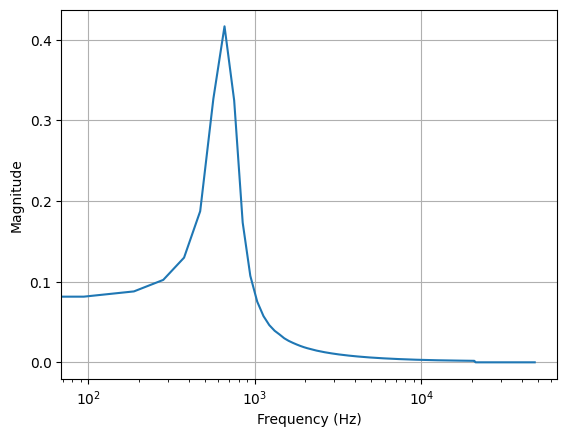

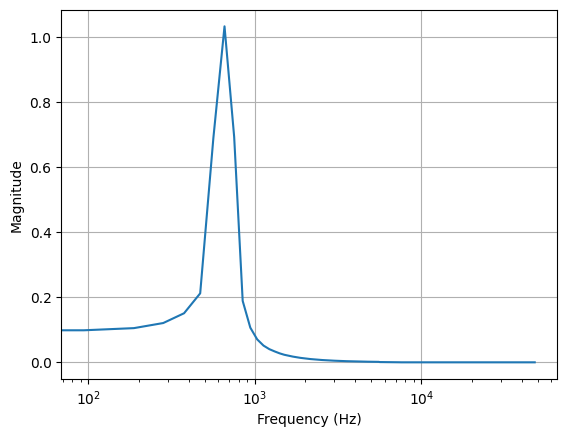

In [3]:
for song in audio_data_with_labels:
    lib.__resetIndexDebug()

    target_device_audio_buffer = []
    envelope = []
    onsets = []
    TA1Buffer = []
    TA2Buffer = []
    magnitudePerBeat = np.zeros((512 * MAX_ONSETS // 512, 512))
    lib.initAf()
    lib.resetBuffer()

    print(song[1])
    for sample in song[0]:
        lib.AFInCAppend(sample)

    lib.AFInCProcess()
    
    print("--- AF in C features ---")
    print("Tempo: ", lib.afGetTempo())
    print("TA1: ", lib.afGetT1A() / sample_rate)
    print("TA2: ", lib.afGetT2A() / sample_rate)
    print("Spectral centroid:", (lib.afGetSpectralCentroid()))
    print("Spectral flatness:", lib.afGetSpectralFlatness())
    print("EQ Low: ", lib.afGetPBandL(), "")
    print("EQ MidLow: ", lib.afGetPBandML(), "")
    print("EQ MidHigh: ", lib.afGetPBandMH(), "")
    print("EQ High: ", lib.afGetPBandH(), "")
    print("Crest Factor:", lib.afGetCrestFactor())
    print("Spectral Flux: ", lib.afGetSpectralFlux())
    print("-------")
    
    for sample in song[0]:
        target_device_audio_buffer.append(lib.__getAudioBuffer())
        envelope.append(lib.__getEnvBuffer())
    
    for onset in range(MAX_ONSETS):
        currentOnset = lib.__getOnsetBuffer()
        if(currentOnset == 0):
            break
        currentTA1 = lib.__getTA1Buffer() / sample_rate
        curretnTA2 = lib.__getTA2Buffer() / sample_rate
        onsets.append(currentOnset)
        TA1Buffer.append(currentTA1)
        TA2Buffer.append(curretnTA2)

    print("TA1 python percentile: ", np.percentile(TA1Buffer, 75))
    print("TA2 python percentile:: ", np.percentile(TA2Buffer, 75))
    print(len(magnitudePerBeat))
    for perBeat, value in enumerate(onsets):
        for bin in range(0,512):
            magnitudePerBeat[perBeat,bin] = lib.__getBeatMagnitude(perBeat)

    print(np.shape(magnitudePerBeat))
    plt.figure(figsize=(30, 12))
    ax = plt.gca()  # Get the current axes for customization
    ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=50))

    plt.plot([i/sampleRate for i in range(len(song[0]))], song[0], label="Python audio")
    plt.plot([i/sampleRate for i in range(len(target_device_audio_buffer))], target_device_audio_buffer, alpha=0.7, label="C Audio")
    plt.plot([i/sampleRate for i in range(len(envelope))], envelope, label="Envelope")
    for i, onset in enumerate(onsets):
        if int(onset) != 0:
            if i == 0:
                plt.axvline(x=int(onset)/sampleRate, color='r', linestyle='--', label="Onsets (compensated)")
            else:
                plt.axvline(x=int(onset)/sampleRate, color='r', linestyle='--')
        
    plt.legend()
    plt.grid()
    plt.show()

    for spec in magnitudePerBeat:
        if np.mean(spec) != 0:
            n = len(spec)
            freq = np.arange(0, sample_rate / 2, sample_rate / n / 2)
            plt.figure()
            plt.grid()
            plt.semilogx(freq, spec)
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Magnitude')
    plt.show()




- Label: 1 - looperman-l-5151565-0354397-spicy-drums, Audio data shape: (302171,), Sample rate: 96000


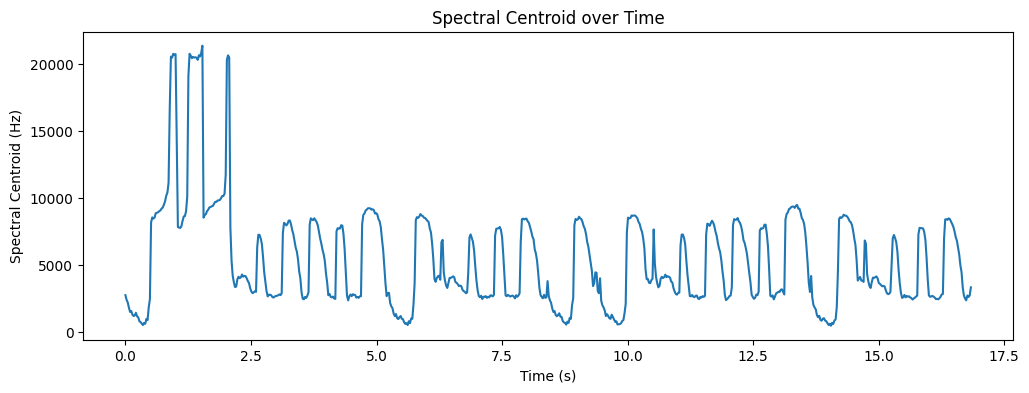

- Label: 2 - looperman-l-2379402-0354276-aftershock-hard-trap-drums-x-808-x-percs-kb, Audio data shape: (302171,), Sample rate: 96000


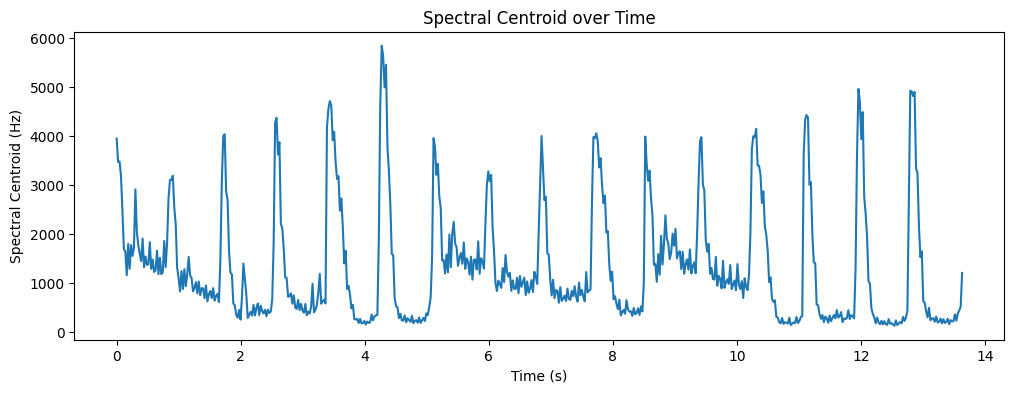

- Label: 8 - 652462__yellowtree__midwest-clean-guitar, Audio data shape: (302171,), Sample rate: 96000


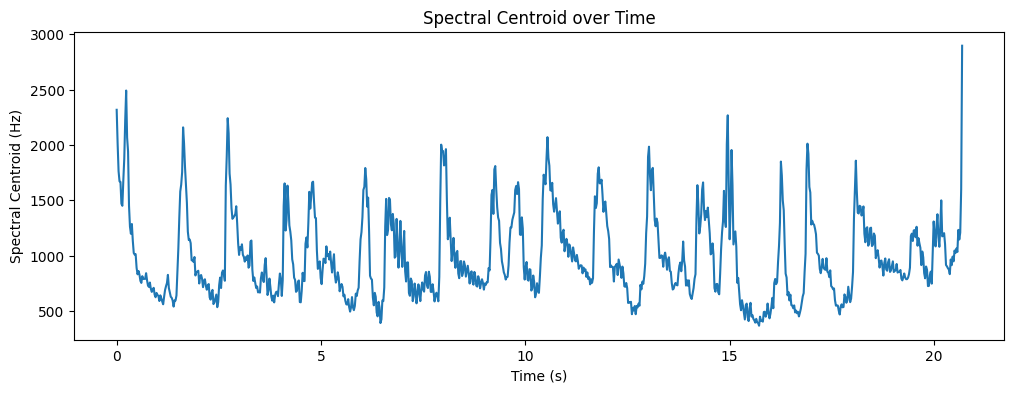

- Label: untitled, Audio data shape: (302171,), Sample rate: 96000


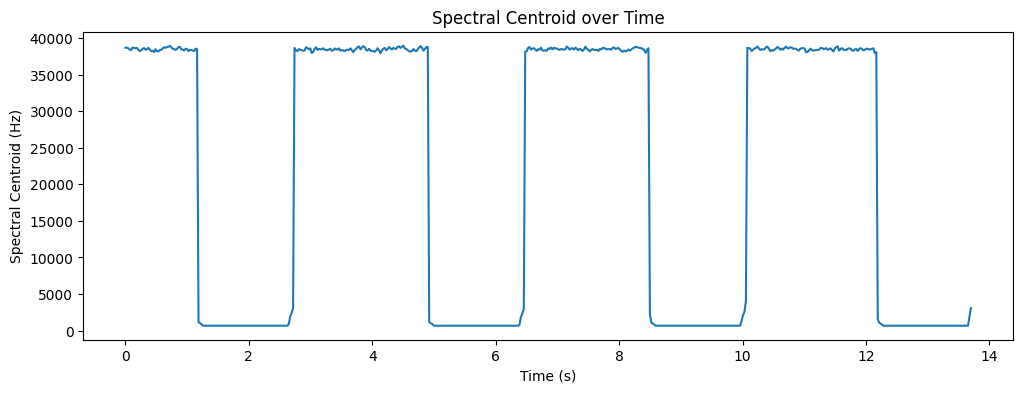

In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load your audio file
filename = 'untitled.wav'
#y, sr = librosa.load(filename, sr=96000)  # Specify the 96kHz sample rate

for y, label, sample_rate in audio_data_with_labels:
    print(f"- Label: {label}, Audio data shape: {audio_data.shape}, Sample rate: {sample_rate}")
    # Calculate spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sample_rate)[0]

    # Let's visualize how the spectral centroid changes over time
    frames = range(len(spectral_centroid))
    t = librosa.frames_to_time(frames)

    # Plot the spectral centroid 
    plt.figure(figsize=(12, 4))
    plt.plot(t, spectral_centroid)
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Centroid (Hz)')
    plt.title('Spectral Centroid over Time')
    plt.show()